<a href="https://colab.research.google.com/github/christdinga/hse_dm/blob/main/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [18]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [19]:
def get_model(t , alpha):
  if t == 'Ridge':
    return Ridge(alpha = alpha , fit_intercept = False)
  else:
    return Lasso(alpha = alpha , fit_intercept = False)

100%|██████████| 100/100 [00:00<00:00, 648.83it/s]


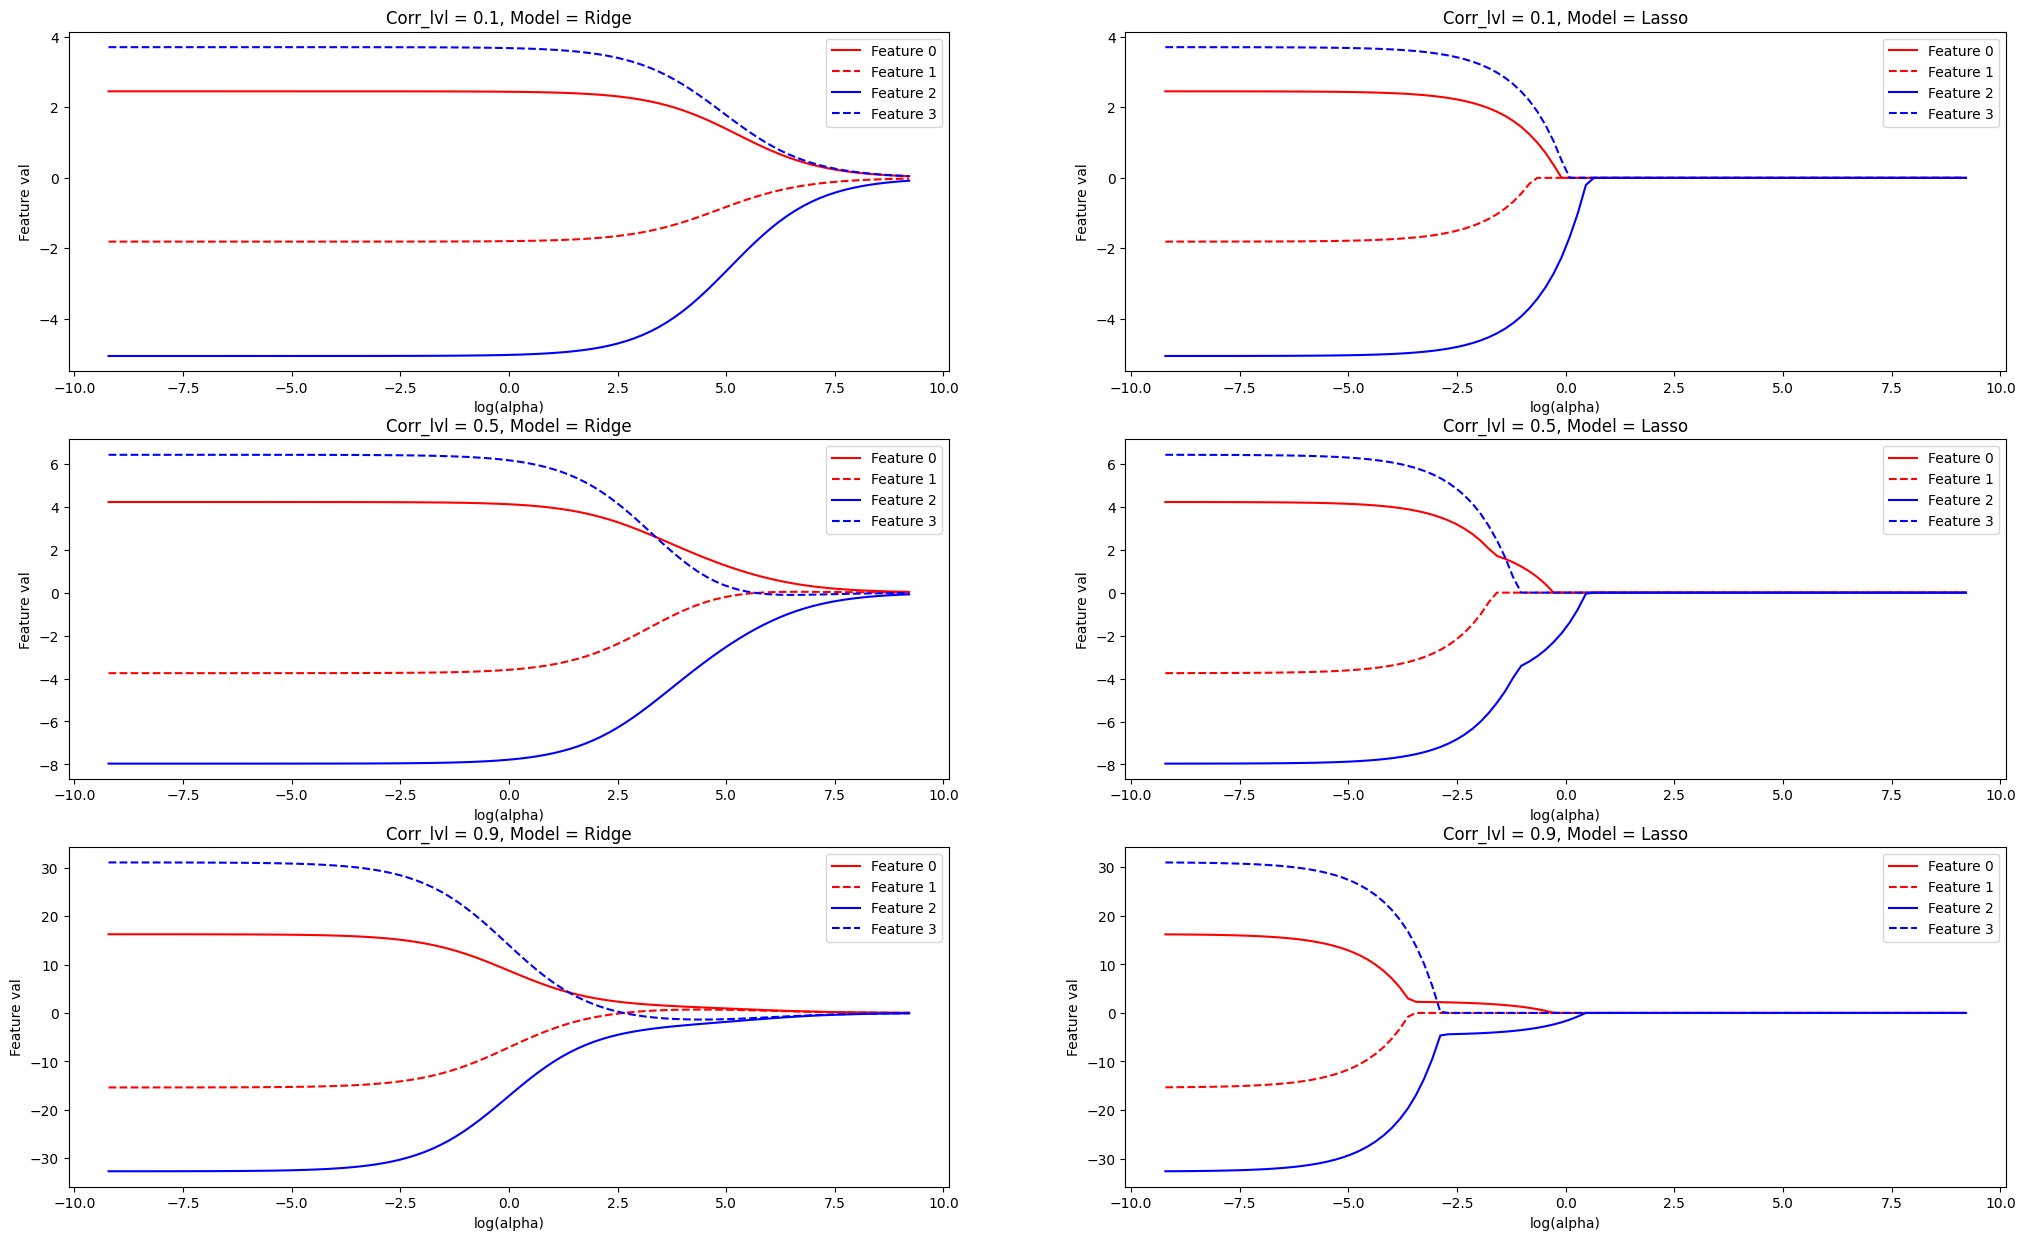

In [20]:
from tqdm import tqdm

fig , axs = plt.subplots(ncols = 2 , nrows = 3 , figsize = (25 , 15))

models = ['Ridge' , 'Lasso']
correlation = [0.1 , 0.5 , 0.9]

for i in range(len(correlation)):
  # dataset to fit (no need to split into train/test in this task):
  X , y = gen_data(500 , correlation[i])

  # regularization powers:
  alpha_values = np.logspace(-4 , 4 , 100 , base=10)

  for j in range(len(models)):
    params = np.empty(shape = (0 , 4))
    for alpha in tqdm(alpha_values):
      model = get_model(models[j] , alpha)
      params = np.concatenate((params , model.fit(X , y).coef_.reshape(1 , 4)) , axis = 0)

    log_alpha_values = np.log(alpha_values)

    axs[i][j].plot(log_alpha_values, params[: , 0] , color='red' , label='0')
    axs[i][j].plot(log_alpha_values, params[: , 2] , '--' , color='red' , label='2')

    axs[i][j].plot(log_alpha_values, params[: , 1] , color='blue' , label='1')
    axs[i][j].plot(log_alpha_values, params[:, 3] , '--' , color='blue' , label='3')

    axs[i][j].legend(['Feature 0' , 'Feature 1' , 'Feature 2' , 'Feature 3'])
    axs[i][j].set_xlabel('log(alpha)')
    axs[i][j].set_ylabel('Feature val')
    axs[i][j].title.set_text(f'Corr_lvl = {correlation[i]}, Model = {models[j]}')

    #<YOUR CODE>

```Lasso``` regularization gradually reduces feature weights to zero individually , whereas ```Ridge``` regularization simultaneously sets all coefficients to zero . When there is high correlation , the coefficients are typically set to zero at lower alpha values .